In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
x1 = np.arange(-1, 11, 0.05)
x2 = np.arange(-1, 11, 0.05)
X1, X2 = np.meshgrid(x1, x2)

In [ ]:
# строю трехмерный график этой функции
y = X2**2 - X1**2 * X2 + 2 * X1 * X2

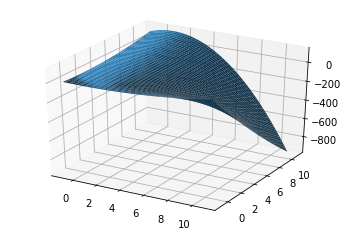

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, y)
plt.show()

Text(0.5, 1.0, 'Our plot')

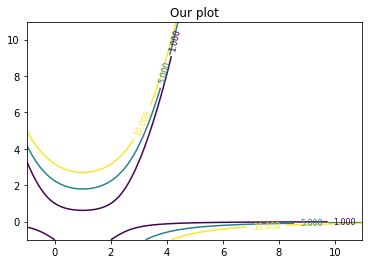

In [ ]:
# а также график линий уровня с уровнями {1, 5, 10}
levels = [1, 5, 10]
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, y, levels = levels)
ax.clabel(CS, inline=True, fontsize=8)
ax.set_title('Our plot')


In [ ]:
# вычисляю вектор градиента и матрицу Гессе для функции f в точке M (2, 1, 1)
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
x3 = np.arange(-5, 5, 0.1)
f = 2 * x1**3 - 3 * x1 * x2 + 2 * x2 * x3**2 - x2**3 
np.gradient(f,  [2, 1, 1])

In [ ]:
from scipy.optimize import approx_fprime

In [ ]:
M = np.array([2, 1, 1])
def gradient(x):
  return 2 * x[0]**3 - 3 * x[0] * x[1] + 2 * x[1] * x[2]**2 - x[1]**3

eps = np.sqrt(np.finfo(float).eps)
approx_fprime(M, gradient, [eps, eps, eps])

array([21.00000024, -7.        ,  4.        ])

In [ ]:
import sympy as sym

In [ ]:
x1 = sym.Symbol('x1')
x2 = sym.Symbol('x2')
x3 = sym.Symbol('x3')


In [ ]:
#для x1
sym.diff(2 * x1**3 - 3 * x1 * x2 + 2 * x2 * x3**2 - x2**3, x1)

6*x1**2 - 3*x2

In [ ]:
sym.diff(6 * x1**2 - 3 * x2, x1, x2)

0

In [ ]:
sym.diff(6 * x1**2 - 3 * x2, x2)

-3

In [ ]:
#x2
sym.diff(2 * x1**3 - 3 * x1 * x2 + 2 * x2 * x3**2 - x2**3, x2)

-3*x1 - 3*x2**2 + 2*x3**2

In [ ]:
sym.diff(-3 * x1 - 3 * x2**2 + 2 * x3**2, x1)

-3

In [ ]:
sym.diff(-3 * x1 - 3 * x2**2 + 2 * x3**2, x2)

-6*x2

In [ ]:
sym.diff(-3 * x1 - 3 * x2**2 + 2 * x3**2, x3)

4*x3

In [ ]:
#x3
sym.diff(2 * x1**3 - 3 * x1 * x2 + 2 * x2 * x3**2 - x2**3, x3)

4*x2*x3

In [ ]:
sym.diff(4 * x2 * x3, x2)

4*x3

In [ ]:
sym.diff(4 * x2 * x3, x3)

4*x2

In [ ]:
#получившаяся матрица
def hessian_matrix(x):
  return np.array([[12*x[0], -3, 0], [-3, -6*x[1], 4*x[2]], [0, 4*x[2], 4*x[1]]])

In [ ]:
#подставляю (2, 1, 1) под иксы и получаю матрицу Гессе
hessian_matrix(M)

array([[24, -3,  0],
       [-3, -6,  4],
       [ 0,  4,  4]])

In [ ]:
# для той же функции f, с использованием критерия Сильвестра, определить, является ли матрица Гессе положительно определенной в точке K
K = np.array([2, -5, -3])

In [ ]:
K_matrix = hessian_matrix(K)
K_matrix

array([[ 24,  -3,   0],
       [ -3,  30, -12],
       [  0, -12, -20]])

In [ ]:
K_matrix_1 = np.array([24])
K_matrix_2 = np.array([[24, -3], [-3, 30]])

In [ ]:
float_matrix_2 = K_matrix_2.astype(float)
float_matrix = K_matrix.astype(float)

In [ ]:
np.linalg.det(float_matrix_2)

710.9999999999998

In [ ]:
np.linalg.det(float_matrix)
# матрица не является положительно определённой или отрицательно определённой, тк значения отпределителей угловых миноров (24, 710, -17676) не все положительны, 
# но и не чередуются, не начинаются с отрицательного

-17675.999999999996